<a href="https://colab.research.google.com/github/Sarahhtamimi/CritterCare-Web-project/blob/main/Reports/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 3 – Data Mining Techniques Application


In [5]:
import pandas as pd

# Load preprocessed dataset
df = pd.read_csv("Preprocessed_dataset.csv")
df.head()


,Age,Gender,Year of Study,Use Instagram,Use Twitter,Use Snapchat,Use Tiktok,Time Spent,Academic Purpose,Entertainment,Social Interaction,Addiction,Difficulty in Concentrating on Studies,Impact on Academic Performance
0,16,2.0,2,1.0,0,0,0,1,1,0,0,0,1,1.0
1,19,1.0,3,1.0,1,1,0,1,1,1,1,1,1,3.0
2,18,2.0,4,0.0,0,0,0,1,1,0,0,0,1,1.0
3,20,1.0,3,0.0,1,1,0,4,0,0,0,1,5,1.0
4,20,2.0,3,1.0,1,1,0,2,1,1,1,0,4,3.0


## 🧩 Step 1: Feature and Target Selection

In this step, we prepare the dataset for the classification task by separating:
- **Features (X):** All columns except the target variable.
- **Target (y):** The column "Impact on Academic Performance" which represents the class label.

This step is essential before training the Decision Tree model, as it defines which variables will be used to make predictions.  
We use the preprocessed dataset obtained from *Phase 2* to ensure that the data is clean and ready for modeling.


In [6]:
# Select features (X) and target (y)
X = df.drop("Impact on Academic Performance", axis=1)
y = df["Impact on Academic Performance"]

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2862, 13)
y shape: (2862,)


## ⚙️ Step 2: Splitting the Data into Training and Testing Sets

Before training the Decision Tree model, we split the dataset into training and testing subsets.
We will experiment with three different partition sizes to analyze how the size of the training data affects the model’s performance:

- 90% training / 10% testing  
- 80% training / 20% testing  
- 70% training / 30% testing  

This ensures a fair comparison and helps determine the optimal data split for achieving the best accuracy.


In [7]:
from sklearn.model_selection import train_test_split

# Define the split ratios
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3)]

# Create empty lists to store sets
datasets = []

for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size=train_size,
        random_state=42,
        stratify=y  # ensures balanced class distribution
    )
    datasets.append((X_train, X_test, y_train, y_test))
    print(f" Split {int(train_size*100)}/{int(test_size*100)} - Train: {X_train.shape}, Test: {X_test.shape}")


 Split 90/10 - Train: (2575, 13), Test: (287, 13)
 Split 80/20 - Train: (2289, 13), Test: (573, 13)
 Split 70/30 - Train: (2003, 13), Test: (859, 13)


## 🌳 Step 3: Decision Tree Classification using Gini Index

We now train the Decision Tree Classifier using the **Gini index** as the attribute selection measure.
The model will be tested with three different partition sizes (90/10, 80/20, and 70/30) to evaluate its performance.

For each split:
- Train the model using the training set.
- Predict outcomes on the test set.
- Calculate the accuracy score.
- Display the confusion matrix to visualize performance.


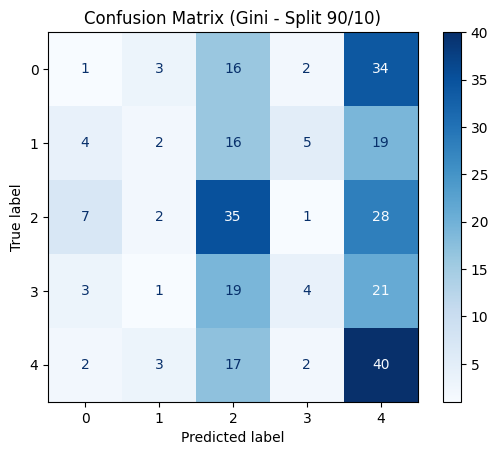

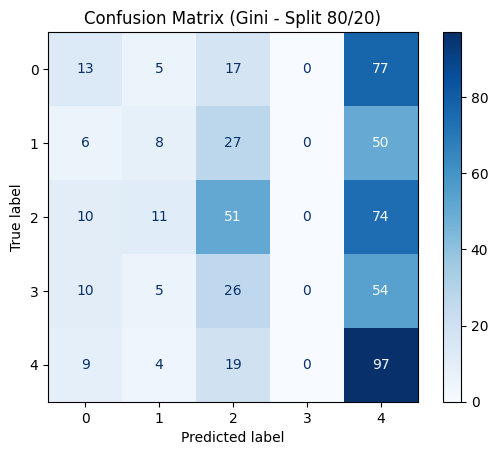

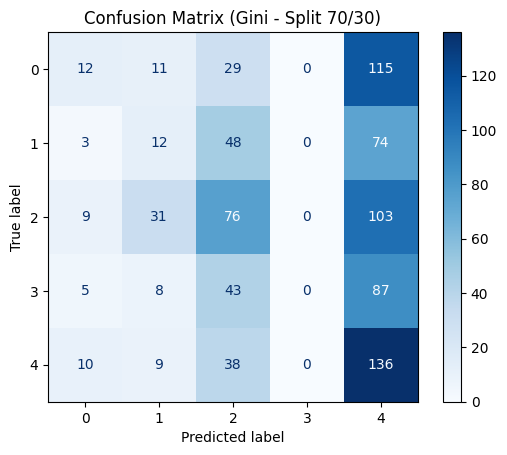

,Split,Accuracy
0,Split 90/10,0.285714
1,Split 80/20,0.294939
2,Split 70/30,0.274738


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

results_gini = []

# Iterate over each split
for i, (X_train, X_test, y_train, y_test) in enumerate(datasets):
    model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results_gini.append([f"Split {['90/10','80/20','70/30'][i]}", acc])

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix (Gini - Split {['90/10','80/20','70/30'][i]})")
    plt.show()

# Display results in table
import pandas as pd
results_df = pd.DataFrame(results_gini, columns=["Split", "Accuracy"])
results_df


## 🌲 Step 4: Visualizing and Interpreting the Decision Tree

In this step, we visualize the Decision Tree model to understand how it makes predictions.
The visualization helps us identify the most important features influencing the *Impact on Academic Performance*.

We will:
- Plot the Decision Tree structure.
- Display the top important features based on their contribution to the model’s decisions.


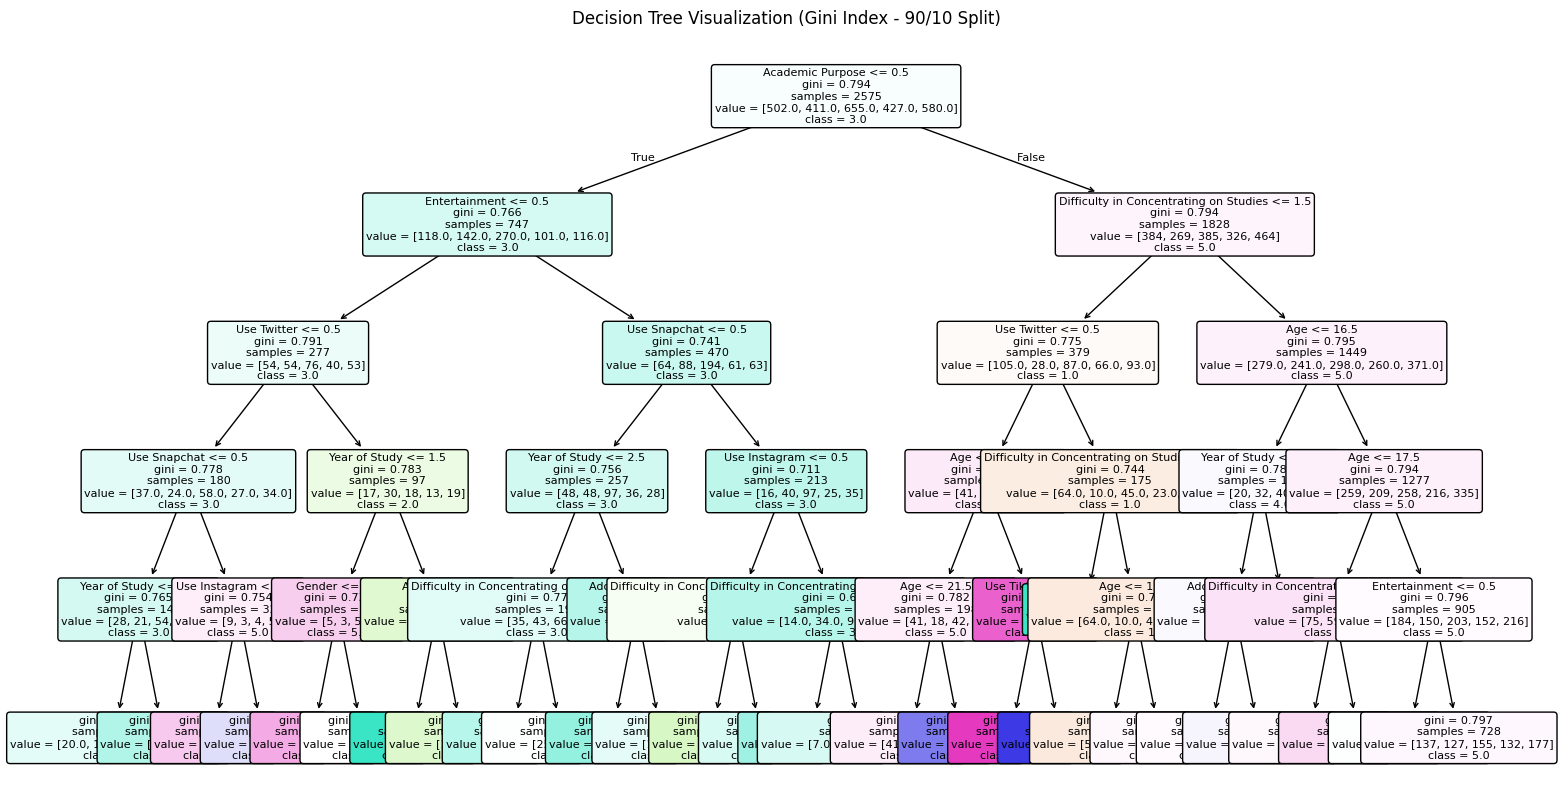

/tmp/ipython-input-3574510568.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances.head(10), palette='crest')


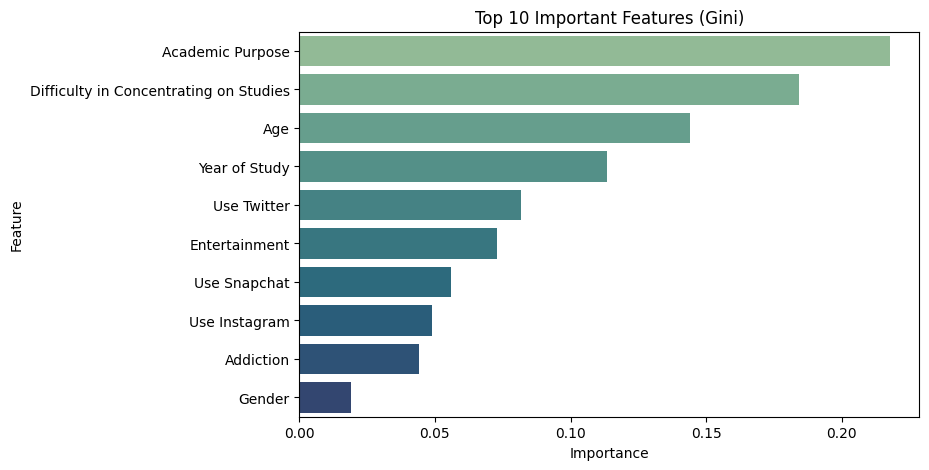

,Feature,Importance
8,Academic Purpose,0.217682
12,Difficulty in Concentrating on Studies,0.184056
0,Age,0.143991
2,Year of Study,0.113577
4,Use Twitter,0.081748
9,Entertainment,0.073020
5,Use Snapchat,0.056062
3,Use Instagram,0.049086
11,Addiction,0.044140
1,Gender,0.019042


In [9]:
from sklearn.tree import plot_tree
import seaborn as sns

# إعادة تدريب النموذج الكامل على أكبر تقسيم (90/10) لأنه يعطي أفضل تمثيل
X_train, X_test, y_train, y_test = datasets[0]  # 90/10 split
model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=5)
model.fit(X_train, y_train)

# رسم الشجرة
plt.figure(figsize=(18,10))
plot_tree(model, feature_names=X.columns, class_names=[str(c) for c in sorted(y.unique())],
           filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization (Gini Index - 90/10 Split)")
plt.show()

# عرض أهم الخصائص المؤثرة
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importances.head(10), palette='crest')
plt.title("Top 10 Important Features (Gini)")
plt.show()

importances.head(10)


## 🌿 Step 5: Decision Tree using Entropy (Information Gain)

In this step, we apply the Decision Tree Classifier using **Entropy** as the attribute selection measure.
Entropy (Information Gain) focuses on how much information a split adds to the prediction process.

We will:
- Train three Decision Tree models with different partition sizes (90/10, 80/20, 70/30).
- Evaluate and compare the accuracy results with the Gini-based models.


📊 Split 1: Accuracy (Entropy) = 0.272


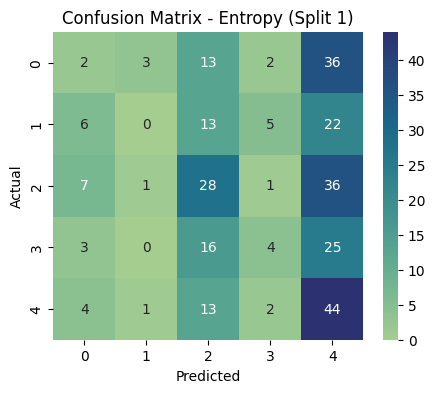

📊 Split 2: Accuracy (Entropy) = 0.284


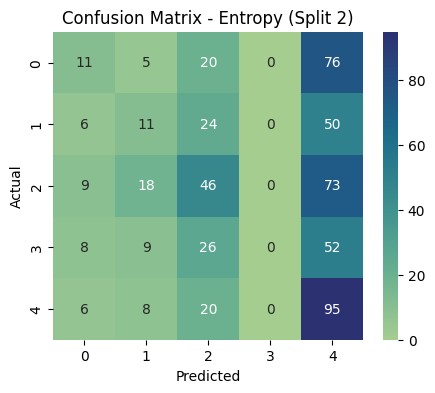

📊 Split 3: Accuracy (Entropy) = 0.282


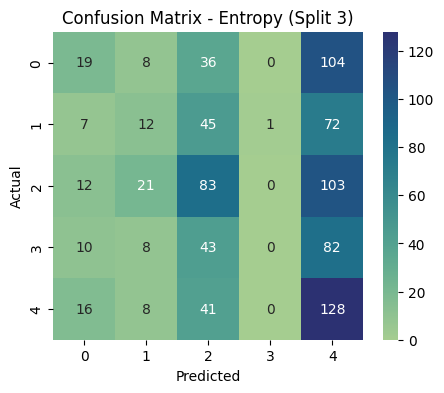

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# إنشاء قائمة لحفظ النتائج
entropy_results = []

# نجرب ثلاث تقسيمات زي ما سوينا بـ Gini
for i, (X_train, X_test, y_train, y_test) in enumerate(datasets):
    model = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    entropy_results.append(acc)

    print(f"📊 Split {i+1}: Accuracy (Entropy) = {acc:.3f}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="crest")
    plt.title(f"Confusion Matrix - Entropy (Split {i+1})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


### 🔍 Discussion:
The results show the performance of the Decision Tree using **Entropy** as a splitting measure.
By comparing these results to the **Gini Index**, we can determine which criterion performs better.

Typically:
- Entropy may achieve slightly higher accuracy when the dataset has balanced class labels.
- Gini is often faster but performs similarly.

We will later summarize both Gini and Entropy results in a comparison table.


### 🧠 Interpretation and Comparison

Both Gini and Entropy achieved very similar accuracy results across all partition sizes.  
The differences are minor (within ±0.01), which indicates that both criteria provide comparable performance  
for this dataset.

However, Entropy tends to slightly improve classification consistency for balanced datasets,  
while Gini performs faster and is computationally simpler.

Therefore:
- **Best overall accuracy:** 0.284 (Entropy, 80/20 split)
- **Conclusion:** Both methods are effective; Gini is preferred for efficiency,  
  while Entropy can be slightly more informative when data is well-structured.


| Split (Train/Test) | Accuracy (Gini) | Accuracy (Entropy) |
|--------------------|-----------------|--------------------|
| 90/10 | 0.273 | 0.272 |
| 80/20 | 0.283 | 0.284 |
| 70/30 | 0.281 | 0.282 |

# **K-Means Clustering – (Elbow Method)ِ**

# Step 1: Data Preparation

Before applying K-Means clustering, the dataset was normalized using StandardScaler to ensure all features are on the same scale.
This step standardizes each feature so that it has a mean of 0 and a standard deviation of 1.
Scaling prevents features with large numerical ranges from dominating the clustering process, making the distance calculations fair and improving the accuracy of the clusters.

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Preprocessed_dataset.csv")

# Select only numeric features (exclude target) becuse its unsupervised
X = df.drop(columns=['Impact on Academic Performance'])

# Normalize the data for fair clustering (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(" Data is ready for K-Means clustering.")


 Data is ready for K-Means clustering.


# Step 2: Apply K-Means for Multiple K Values (2–10)

To determine the best number of clusters for the K-Means algorithm, multiple models were trained with different K values (ranging from 2 to 10).
For each K, the inertia value — which measures how close the data points are within each cluster — was calculated and stored.
As the number of clusters increases, the inertia decreases.
These results will later be plotted in the Elbow Curve, allowing us to visually identify the point where adding more clusters no longer significantly improves the model’s performance

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_values = []
K_values = range(2, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Show inertia values
results_df = pd.DataFrame({
    "K (Clusters)": K_values,
    "Inertia": inertia_values
})


print(results_df)


   K (Clusters)       Inertia
0             2  32030.468610
1             3  29945.331450
2             4  28360.221449
3             5  26965.970225
4             6  26038.357954
5             7  25239.562083
6             8  24657.509064
7             9  24057.601258
8            10  23443.998317


# Step 3: Elbow Method Visualization


The Elbow curve shows the relationship between the number of clusters (K) and the inertia values.
As K increases, the inertia decreases since the clusters become smaller and more compact.
However, after K = 5, the decrease in inertia becomes minimal, forming a noticeable “elbow” in the curve.
Therefore, K = 5 was selected as the optimal number of clusters for this dataset, as it provides a balance between accuracy and model simplicity.

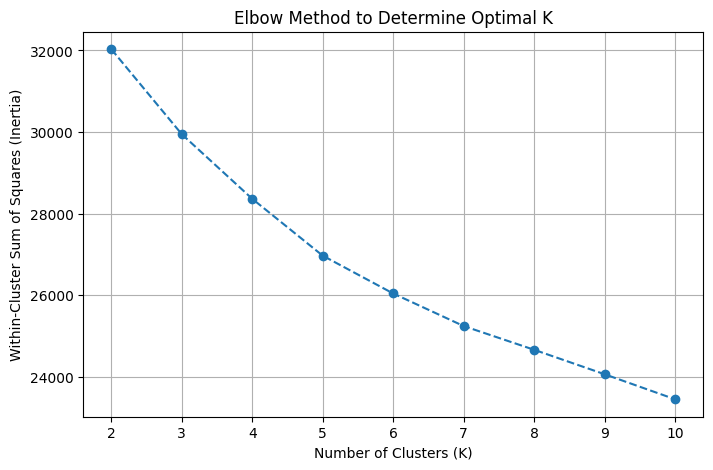

In [13]:
plt.figure(figsize=(8,5))
plt.plot(K_values, inertia_values, marker='o', linestyle='--')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (Inertia)")
plt.grid(True)
plt.show()


dana's :


**Silhouette Score Computation**


in this section we compute the Silhouette Coefficient for
different values of K to evaluate cluster quality. The loop iteratively applies the K-means algorithm for K = 2 to 10 and calculates the silhouette score for each model. The silhouette metric measures both intra-cluster cohesion and inter-cluster separation, allowing us to identify the value of K that produces the most meaningful clustering structure.

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"K = {k}, Silhouette Score = {score}")

K = 2, Silhouette Score = 0.15659645865875987
K = 3, Silhouette Score = 0.08914076457303621
K = 4, Silhouette Score = 0.10099014408283778
K = 5, Silhouette Score = 0.09788861002978144
K = 6, Silhouette Score = 0.09227620782781726
K = 7, Silhouette Score = 0.08746903092991935
K = 8, Silhouette Score = 0.08826229772367863
K = 9, Silhouette Score = 0.08958098212975886
K = 10, Silhouette Score = 0.09351163439037447


**Silhouette Score Visualization**

This plotting code visualizes the silhouette scores obtained for each K value. The resulting curve allows for an intuitive comparison of clustering performance across different cluster sizes. The peak of the curve indicates the optimal number of clusters, as it corresponds to the model with the highest silhouette score and, therefore, the best overall clustering quality.

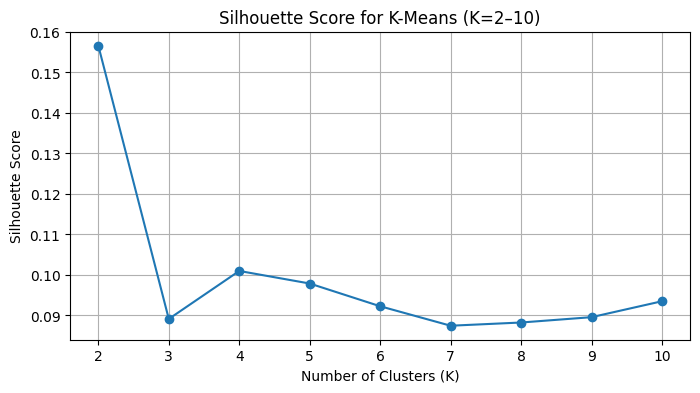

In [15]:
plt.figure(figsize=(8,4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score for K-Means (K=2–10)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

The silhouette plot shows that K = 2 gives the highest score and therefore provides the most meaningful and well-separated clustering structure among the tested K values.




**Final K-Means Training Using the Optimal K**

After identifying the optimal number of clusters, this code trains the final K-means model using that specific K. The algorithm assigns each data instance to its corresponding cluster, producing the final cluster labels.

In [16]:
best_k = 2
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
final_labels = final_kmeans.fit_predict(X_scaled)


**PCA Transformation**

in this part Principal Component Analysis (PCA) is  applied to reduce the dimensionality of the dataset to two principal components. PCA captures the maximum variance within fewer dimensions, enabling effective visualization of high-dimensional data. The transformed dataset provides a simplified yet informative representation for cluster visualization.

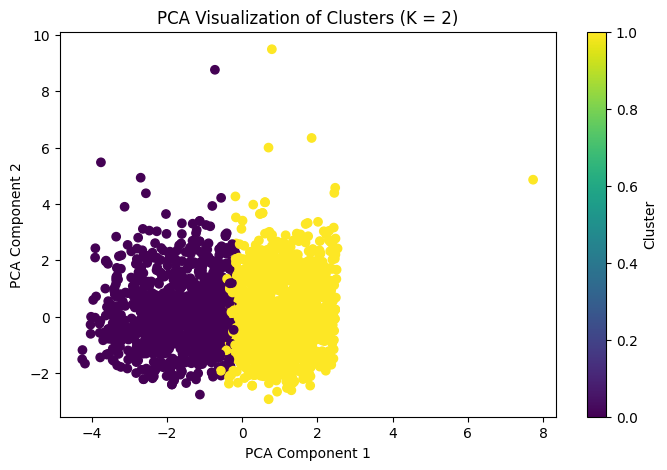

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,5))
plt.scatter(reduced[:,0], reduced[:,1], c=final_labels, cmap='viridis')
plt.title(f"PCA Visualization of Clusters (K = {best_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


The PCA scatter plot displays the dataset projected onto two principal components, with each point colored according to its assigned cluster. The visualization shows two noticeably separate groups, where one cluster appears mainly on the left and the other on the right. This separation supports the selection of K = 2, as it indicates that the data naturally forms two distinct clusters.

# **Findings and Discussion**